## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!nvidia-smi

Fri Apr 19 10:15:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 433 (delta 152), reused 132 (delta 128), pack-reused 231
Receiving objects: 100% (433/433), 12.86 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [4]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [5]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

# !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

/content
/content/weights
Mounted at /content/drive/


In [6]:
import os

# WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
# WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
WEIGHTS_NAME = "checkpoint0006.pth"
WEIGHTS_PATH = "/content/drive/MyDrive/Graduate School/" + WEIGHTS_NAME


print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/Graduate School/checkpoint0006.pth ; exist: True


## Download Example Data

In [7]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [8]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [17]:
# path_to_dataset = "/content/drive/MyDrive/545 Project/Datasets/RefCOCO_3ds_3k_images"
# path_to_dataset = "/content/drive/MyDrive/HRVIP"
path_to_dataset = "/content/drive/MyDrive/Graduate School"
path_to_dataset_test_images = path_to_dataset + "/test_RefCOCOg/images/"
path_to_dataset_test_instances = path_to_dataset + "/test_RefCOCOg/instances.json"
path_to_dataset_test_refs = path_to_dataset + "/test_RefCOCOg/refs.json"

import json
instances_file = open(path_to_dataset_test_instances)
instnaces_dict = json.load(instances_file)
refs_file = open(path_to_dataset_test_refs)
refs_list = json.load(refs_file)

# find mapping for image_name to annotation
image_to_annotations_map = {}
for anno_id, anno in enumerate(instnaces_dict["annotations"]):
 image_id = instnaces_dict["annotations"][anno_id]["image_id"]
 if image_id in list(image_to_annotations_map.keys()):
  image_to_annotations_map[image_id].append(anno_id)
 else:
  image_to_annotations_map[image_id] = [anno_id]

print(image_to_annotations_map)
print(len(instnaces_dict["annotations"]))


# find mapping for category it to category type
category_id_to_name_map = {}
for category in instnaces_dict["categories"]:
  category_id_to_name_map[category["id"]] = category["name"]

# create ann_id to refs index
ann_id_to_refs_index = {}
for ref_index, ref in enumerate(refs_list):
  ann_id_to_refs_index[ref['ann_id']] = ref_index

print(ann_id_to_refs_index)
print(image_to_annotations_map.keys())
print(instnaces_dict["annotations"])

# image_id to image_index in instances["iamges"][idx] mapping
image_id_to_instance_image_idx_map = {}
for image_idx, image in enumerate(instnaces_dict["images"]):
  image_id_to_instance_image_idx_map[image["id"]] = image_idx

{260: [0, 1, 2, 3, 4, 5, 6], 262893: [7, 8, 9], 526087: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 395214: [32, 33, 34, 35, 36, 37, 38, 39], 264212: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 265454: [63, 64, 65], 397173: [66, 67, 68, 69], 397826: [70, 71], 528900: [72, 73, 74, 75, 76], 4947: [77, 78, 79, 80, 81, 82], 529613: [83, 84, 85, 86, 87, 88, 89], 136711: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 398917: [100, 101, 102, 103], 136922: [104, 105, 106], 268428: [107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122], 6407: [123, 124, 125, 126, 127], 400726: [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 139152: [150, 151, 152], 139344: [153, 154, 155], 401821: [156, 157], 140320: [158, 159, 160], 9708: [161, 162, 163, 164, 165, 166, 167, 168, 169], 534332: [170, 171, 172, 173, 174, 175, 176, 177,

In [10]:
import random
anno_id = 243
anno_sentences = refs_list[ann_id_to_refs_index[anno_id]]['sentences']
num_sentences = len(anno_sentences)
selected_sentence = anno_sentences[random.randint(0,num_sentences-1)]['sent']
print(selected_sentence)

KeyError: 243

In [25]:
# VISUALIZE ALL ANNOTATIONS FOR ALL IMAGES
import torch
import copy
from tqdm import tqdm

img_h, img_w = [instnaces_dict["images"][0]["height"],instnaces_dict["images"][0]["width"]]
images_in_dataset = list(image_to_annotations_map.keys())

# loop through all images in specified dataset
for image_id in tqdm(images_in_dataset):

  num_annotations = len(image_to_annotations_map[image_id]) # number of annotations for image

  img_h = instnaces_dict["images"][image_id_to_instance_image_idx_map[image_id]]['height']
  img_w = instnaces_dict["images"][image_id_to_instance_image_idx_map[image_id]]['width']

  # initialize bounding boxes and phrases
  boxes = torch.zeros((num_annotations,4))
  phrases = []

  # loop through all annotations for the image
  for bbox_index, anno_id in enumerate(image_to_annotations_map[image_id]):

    # convert pixel bounding box (xmin, ymin, w, h) to percentage bounding box (xcenter,ycenter,w,h)
    bbox_pix = instnaces_dict["annotations"][anno_id]["bbox"]
    bbox_pix_shifted = copy.deepcopy(bbox_pix)
    bbox_pix_shifted[0] += bbox_pix_shifted[2]/2
    bbox_pix_shifted[1] += bbox_pix_shifted[3]/2

    bbox_per = torch.tensor([bbox_pix_shifted[0]/img_w, bbox_pix_shifted[1]/img_h, bbox_pix_shifted[2]/img_w, bbox_pix_shifted[3]/img_h])
    boxes[bbox_index,:] = bbox_per


    phrases.append(str(instnaces_dict["annotations"][anno_id]["category_id"])) # for visualization

  logits = torch.zeros(num_annotations) # for visualization


100%|██████████| 343/343 [00:00<00:00, 6015.24it/s]


In [21]:
print(instnaces_dict["annotations"][anno_id])
print(instnaces_dict["images"][0])
image_id = 260
print(instnaces_dict["images"][image_id_to_instance_image_idx_map[image_id]]['height'])

{'segmentation': [[2.14, 99.82, 29.93, 95.67, 73.69, 96.63, 76.25, 109.41, 101.8, 115.48, 106.59, 125.38, 107.23, 130.81, 104.04, 140.71, 96.05, 141.67, 90.94, 135.92, 78.48, 136.88, 76.57, 142.95, 66.98, 142.95, 66.67, 137.2, 53.89, 137.2, 52.93, 142.63, 39.51, 142.63, 36.96, 137.52, 25.46, 137.2, 23.86, 142.63, 10.77, 142.95, 2.78, 128.57, 2.46, 116.11]], 'area': 3922.1866999999997, 'iscrowd': 0, 'image_id': 261381, 'bbox': [2.14, 95.67, 105.09, 47.28], 'category_id': 3, 'id': 2169787}
{'license': 2, 'file_name': 'COCO_train2014_000000000260.jpg', 'coco_url': 'http://mscoco.org/images/260', 'height': 333, 'width': 500, 'date_captured': '2013-11-14 16:53:24', 'flickr_url': 'http://farm1.staticflickr.com/107/265933804_56b3c36bc4_z.jpg', 'id': 260}
333


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


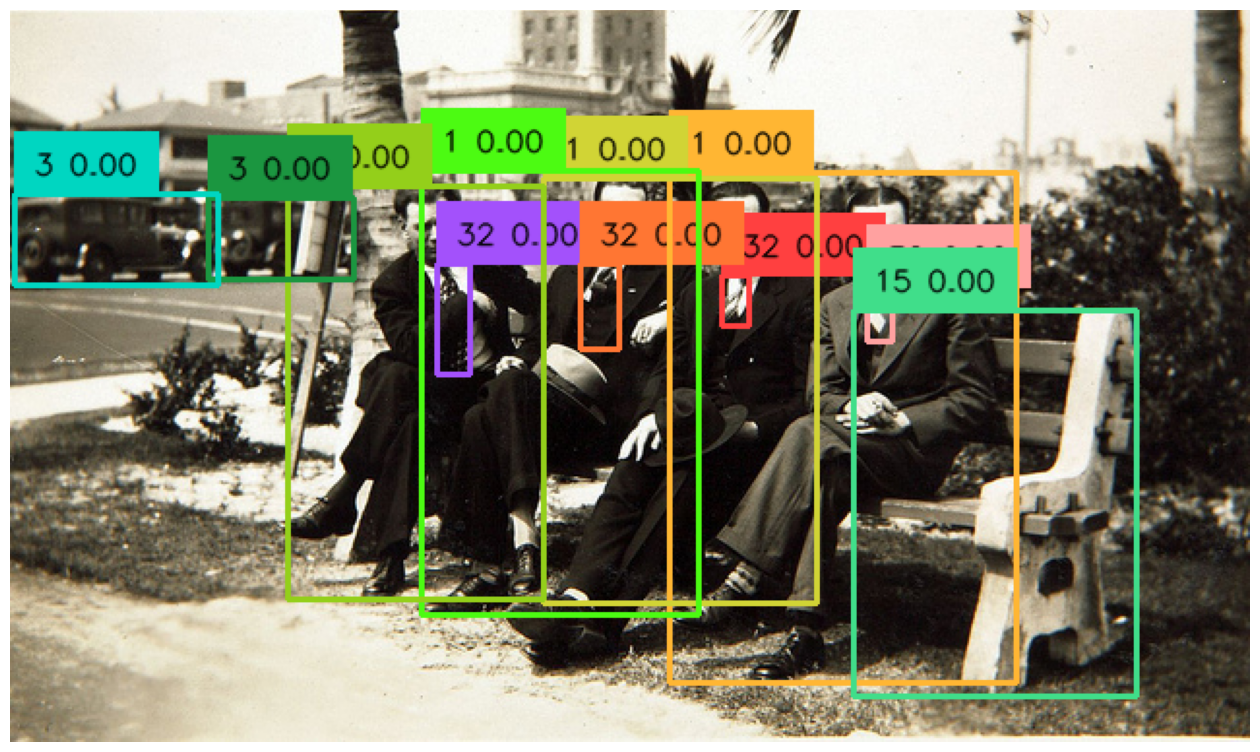

In [26]:
# annotate image with ground truth data
import torch
import copy
from tqdm import tqdm
import os
import supervision as sv
from torch import tensor

# IMAGE_NAME = str(image_id).zfill(6) + ".png"
IMAGE_NAME = "COCO_train2014_" + str(anno['image_id']).zfill(12) + ".jpg"
IMAGE_PATH = path_to_dataset_test_images + IMAGE_NAME

TEXT_PROMPT = "baseball bat"
BOX_TRESHOLD = 0.20 # 35
TEXT_TRESHOLD = 0.20  #25

image_source, image = load_image(IMAGE_PATH)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [27]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.4 MB/s eta 0:00:00


In [ ]:
# EVALUATE
import torch
import copy
from tqdm import tqdm
import os
import supervision as sv
from torch import tensor
from torchmetrics.detection import MeanAveragePrecision
from pprint import pprint


img_h, img_w = [instnaces_dict["images"][0]["height"],instnaces_dict["images"][0]["width"]]

def convert_pix_coords_to_absolute_pixels(bbox,img_w,img_h):
  bbox[0] *= img_w
  bbox[2] *= img_w
  bbox[1] *= img_h
  bbox[3] *= img_h

  bbox = bbox.int()
  bbox = bbox.float().reshape(1,-1)

  return bbox


metric_1 = MeanAveragePrecision(box_format = 'cxcywh', iou_type="bbox")
metric_2 = MeanAveragePrecision(box_format = 'cxcywh', iou_type="bbox")
metric_3 = MeanAveragePrecision(box_format = 'cxcywh', iou_type="bbox")

BOX_TRESHOLD = 0.10 # 35
TEXT_TRESHOLD = 0.10  #25

images_in_dataset = list(image_to_annotations_map.keys())

# loop through all images in specified dataset
for image_id in tqdm(images_in_dataset):

  # IMAGE_NAME = str(image_id).zfill(6) + ".png"
  IMAGE_NAME = "COCO_train2014_" + str(anno['image_id']).zfill(12) + ".jpg"
  IMAGE_PATH = path_to_dataset_test_images + IMAGE_NAME

  num_annotations = len(image_to_annotations_map[image_id]) # number of annotations for image

  img_h = instnaces_dict["images"][image_id_to_instance_image_idx_map[image_id]]['height']
  img_w = instnaces_dict["images"][image_id_to_instance_image_idx_map[image_id]]['width']

  # loop through all ground truth bounding boxes for the image
  for bbox_index, anno_id in enumerate(image_to_annotations_map[image_id]):

    # find the ground truth bounding box
    # convert pixel bounding box (xmin, ymin, w, h) to percentage bounding box (xcenter,ycenter,w,h)
    bbox_pix = instnaces_dict["annotations"][anno_id]["bbox"]
    bbox_pix_shifted = copy.deepcopy(bbox_pix)
    bbox_pix_shifted[0] += bbox_pix_shifted[2]/2
    bbox_pix_shifted[1] += bbox_pix_shifted[3]/2
    box_gt = torch.tensor([bbox_pix_shifted[0]/img_w, bbox_pix_shifted[1]/img_h, bbox_pix_shifted[2]/img_w, bbox_pix_shifted[3]/img_h])

    # choose randome annotation phrase
    anno_sentences = refs_list[anno_id]['sentences']
    num_sentences = len(anno_sentences)
    TEXT_PROMPT = anno_sentences[random.randint(0,num_sentences-1)]['sent']


    # find the predicted bounding boxes
    image_source, image = load_image(IMAGE_PATH)
    boxes_pred, logits, phrases = predict(
        model=model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    box_gt = convert_pix_coords_to_absolute_pixels(box_gt,img_w,img_h)
    target = [dict(boxes=box_gt,
                  labels=tensor([0]),)]

    if boxes_pred.shape[0] >= 1:
      box_pred = convert_pix_coords_to_absolute_pixels(boxes_pred[0,:],img_w,img_h)
      preds = [dict(
       boxes=box_pred,
       scores=logits[0].reshape(1),
       labels=tensor([0]),)]
      metric_1.update(preds,target)

    if boxes_pred.shape[0] >= 2:
      box_pred = convert_pix_coords_to_absolute_pixels(boxes_pred[1,:],img_w,img_h)
      preds = [dict(
       boxes=box_pred,
       scores=logits[0].reshape(1),
       labels=tensor([0]),)]
      metric_2.update(preds,target)

    if boxes_pred.shape[0] >= 3:
      box_pred = convert_pix_coords_to_absolute_pixels(boxes_pred[2,:],img_w,img_h)
      preds = [dict(
       boxes=box_pred,
       scores=logits[0].reshape(1),
       labels=tensor([0]),)]
      metric_3.update(preds,target)

    # visualize
    # boxes_pred = torch.vstack((boxes_pred,box_gt))
    # new = torch.tensor([-1.0])
    # logits = torch.cat((logits,new))
    # phrases.append("GT")
    # annotated_frame = annotate(image_source=image_source, boxes=boxes_pred, logits=logits, phrases=phrases)
    # %matplotlib inline
    # sv.plot_image(annotated_frame, (16, 16))

print()
print("1")
pprint(metric_1.compute())
print("2")
pprint(metric_2.compute())
print("3")
pprint(metric_3.compute())

 10%|▉         | 33/343 [02:02<22:39,  4.39s/it]

## Grounding DINO Demo

tensor([[0.3161, 0.5309, 0.0500, 0.2600],
        [0.5100, 0.4627, 0.0197, 0.2509],
        [0.6119, 0.4729, 0.0329, 0.2528],
        [0.4975, 0.6442, 0.0395, 0.1127],
        [0.5596, 0.5009, 0.0777, 0.0275],
        [0.1050, 0.5770, 0.0734, 0.2072],
        [0.6109, 0.2517, 0.0258, 0.1984]])
torch.Size([7])
7


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


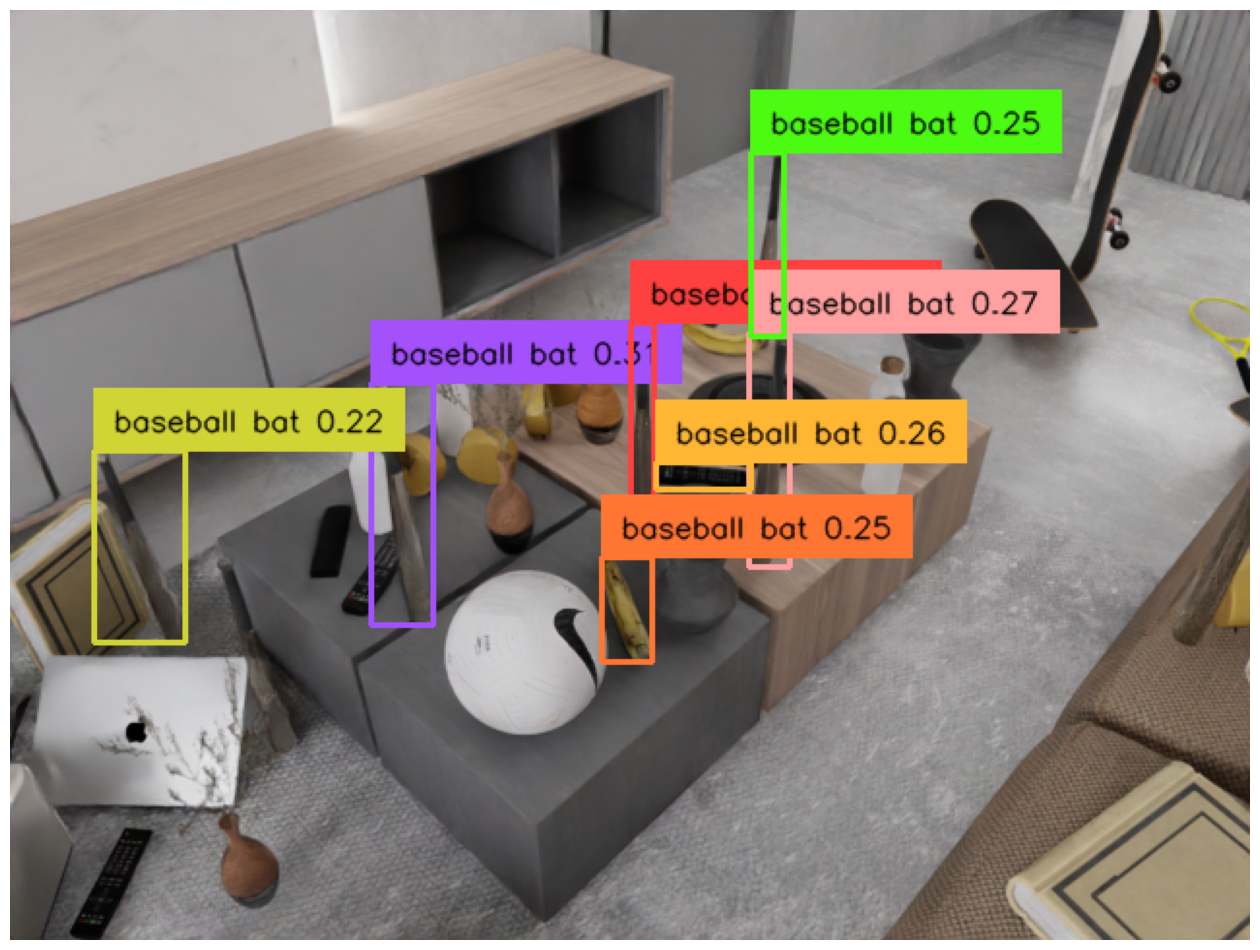

In [ ]:
# output predictions

import os
import supervision as sv

images = ["000006.png"]

IMAGE_NAME = path_to_dataset_test_images + "000006.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "baseball bat"
BOX_TRESHOLD = 0.20 # 35
TEXT_TRESHOLD = 0.20  #25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)


print("="*30)
print(boxes)
print(logits.shape)
print(len(phrases))
print("="*30)
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
# compute evaluation metic



SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


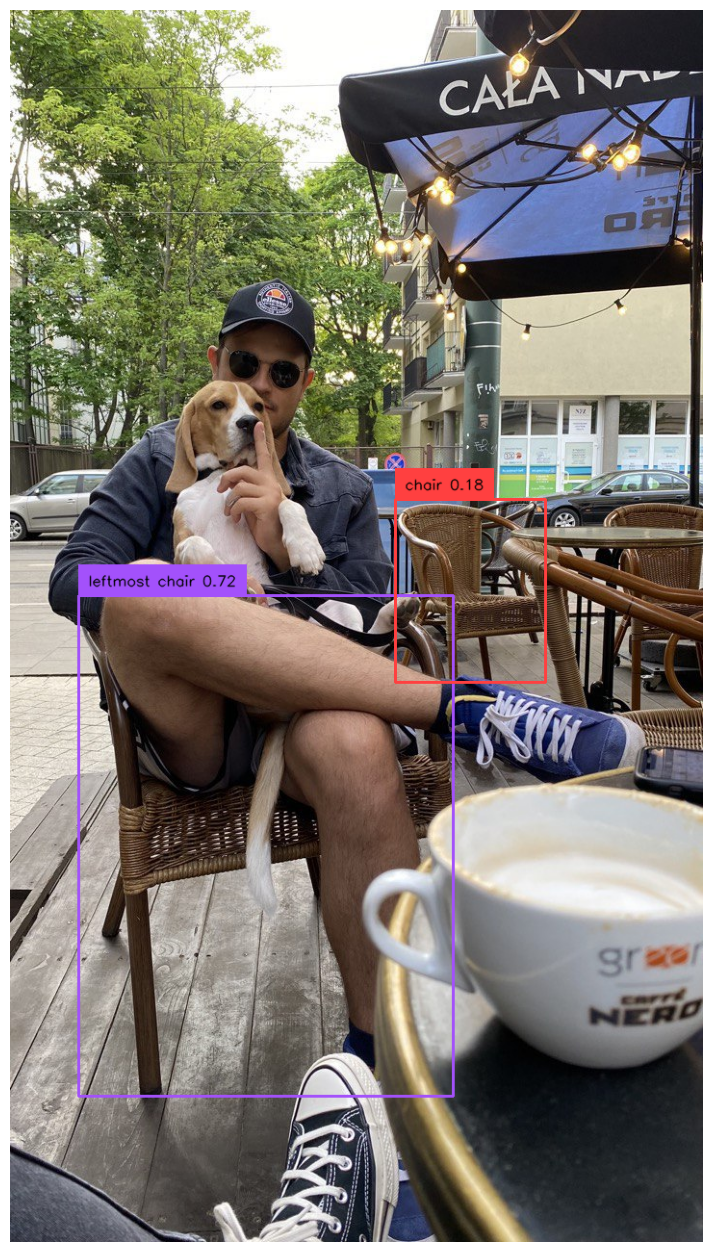

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "leftmost chair"
BOX_TRESHOLD = 0.15   # 15
TEXT_TRESHOLD = 0.15  # 15

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## Grounding DINO with Roboflow Dataset